In [1]:
#reserve for library installations

In [2]:
#reserve for library imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.svm import SVC



# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#directory paths 

transPath = '../dataTransforms'
modelPath = '../models'

In [5]:
data = 'heart.csv'
path = '../data/'
FullPath =  path + data
df = pd.read_csv(FullPath)

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#inspect the structure and types of your data

In [8]:
df.shape #view data dimensions 303 samples and 13 features

(303, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Deductions 
### 1. all numeric 
### 2. no missing values 
### 3. 13 features 
### 4. 303 samples 

In [10]:
#inspect the data for distribution anomalies 

# check for class imbalance
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [11]:
#inspect for data mislables and errors 
df.sex.unique()
#inspect all categorical features in the data

array([1, 0])

In [12]:
cols = list(df.columns)
for var in cols:
    print (var, df[var].unique())
    print('***********************************')

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
***********************************
sex [1 0]
***********************************
cp [3 2 1 0]
***********************************
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
***********************************
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 

<AxesSubplot:ylabel='Density'>

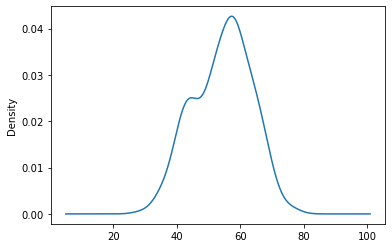

In [13]:
#visualize the distribution in the data
df.age.plot(kind='density')

<AxesSubplot:>

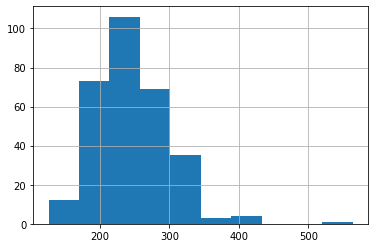

In [14]:
df.chol.hist()

<AxesSubplot:ylabel='Density'>

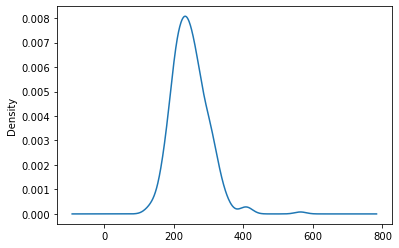

In [15]:
df.chol.plot(kind='density')

In [16]:
def outliers(df,ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls 

index_list = []
for feature in list(df.columns):
    index_list.extend(outliers(df,feature))
    

def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df 


In [17]:
df = remove(df,index_list)

In [18]:
# inspect for anomalies in feature behavior 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,228.0,53.333333,9.229016,29.0,45.00,54.0,60.00,76.0
sex,228.0,0.675439,0.469241,0.0,0.00,1.0,1.00,1.0
cp,228.0,0.942982,1.020190,0.0,0.00,1.0,2.00,3.0
trtbps,228.0,128.671053,15.349142,94.0,120.00,130.0,140.00,170.0
chol,228.0,242.372807,44.329827,131.0,209.75,239.0,269.25,360.0
fbs,228.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
restecg,228.0,0.548246,0.516125,0.0,0.00,1.0,1.00,2.0
thalachh,228.0,151.070175,22.492963,88.0,137.50,155.0,168.25,202.0
exng,228.0,0.315789,0.465852,0.0,0.00,0.0,1.00,1.0
oldpeak,228.0,0.946053,1.035422,0.0,0.00,0.6,1.60,4.0


In [19]:
## From the above oberservations, the data needs to be rescale

In [20]:
# copying the dataframe 
df_clean = df.copy()

In [21]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,228.0,53.333333,9.229016,29.0,45.00,54.0,60.00,76.0
sex,228.0,0.675439,0.469241,0.0,0.00,1.0,1.00,1.0
cp,228.0,0.942982,1.020190,0.0,0.00,1.0,2.00,3.0
trtbps,228.0,128.671053,15.349142,94.0,120.00,130.0,140.00,170.0
chol,228.0,242.372807,44.329827,131.0,209.75,239.0,269.25,360.0
fbs,228.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
restecg,228.0,0.548246,0.516125,0.0,0.00,1.0,1.00,2.0
thalachh,228.0,151.070175,22.492963,88.0,137.50,155.0,168.25,202.0
exng,228.0,0.315789,0.465852,0.0,0.00,0.0,1.00,1.0
oldpeak,228.0,0.946053,1.035422,0.0,0.00,0.6,1.60,4.0


In [22]:
#Standadizing the data
scaleStandard = StandardScaler()
df_clean = scaleStandard.fit_transform(df_clean)
df_clean = pd.DataFrame(df_clean, columns = df.columns)

In [23]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,228.0,-3.569270e-16,1.0022,-2.642413,-0.904936,0.072395,0.723949,2.461426
sex,228.0,7.683912e-16,1.0022,-1.442595,-1.442595,0.693195,0.693195,0.693195
cp,228.0,-2.897901e-16,1.0022,-0.926354,-0.926354,0.056012,1.038378,2.020745
trtbps,228.0,-7.855558e-16,1.0022,-2.263797,-0.566164,0.086772,0.739707,2.698514
chol,228.0,-7.413660e-17,1.0022,-2.517895,-0.737530,-0.076252,0.607634,2.659293
fbs,228.0,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
restecg,228.0,-4.869399e-18,1.0022,-1.064572,-1.064572,0.877208,0.877208,2.818987
thalachh,228.0,-1.675073e-16,1.0022,-2.810165,-0.604635,0.175098,0.765467,2.269238
exng,228.0,3.652049e-16,1.0022,-0.679366,-0.679366,-0.679366,1.471960,1.471960
oldpeak,228.0,-2.415222e-16,1.0022,-0.915698,-0.915698,-0.334949,0.632965,2.955960


In [24]:
#Rescaling the dataframe
scaleMinMax = MinMaxScaler()
df_clean = scaleMinMax.fit_transform(df_clean)
df_clean = pd.DataFrame(df_clean, columns = df.columns)

In [25]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
age,228.0,0.517730,0.196362,0.0,0.340426,0.531915,0.659574,1.0
sex,228.0,0.675439,0.469241,0.0,0.000000,1.000000,1.000000,1.0
cp,228.0,0.314327,0.340063,0.0,0.000000,0.333333,0.666667,1.0
trtbps,228.0,0.456198,0.201962,0.0,0.342105,0.473684,0.605263,1.0
chol,228.0,0.486344,0.193580,0.0,0.343886,0.471616,0.603712,1.0
fbs,228.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
restecg,228.0,0.274123,0.258062,0.0,0.000000,0.500000,0.500000,1.0
thalachh,228.0,0.553247,0.197307,0.0,0.434211,0.587719,0.703947,1.0
exng,228.0,0.315789,0.465852,0.0,0.000000,0.000000,1.000000,1.0
oldpeak,228.0,0.236513,0.258856,0.0,0.000000,0.150000,0.400000,1.0


In [26]:
dataArr = df.values #converting our dataframe into an array

In [27]:
dataArr

array([[37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       [56.,  1.,  1., ...,  0.,  2.,  1.],
       ...,
       [45.,  1.,  3., ...,  0.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

In [28]:
list(df.columns).index('output')

13

In [29]:
X = dataArr[:,0:13]
y = dataArr[:,13]

In [30]:
def modelBuilder(algorithm):
    seedSearch = []
    for i in range(21):
        seedSearch.append(i)

    modelList = []
    for seed in seedSearch:
        Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2,random_state=seed)
        model = algorithm #empty modeland has learnt nothing 

            #send the model to school to learn the functions of x required to predict y
        model.fit(Xtrain,yTrain)
        modelList.append(model.score(Xtest, yTest))

        print(seed, ":", model.score(Xtest, yTest))

        modelList.sort() 

    print(f"The best score for {model} is:  {modelList[-1]}" )
    print('*' * 70)


In [31]:
modelBuilder(LogisticRegression())

0 : 0.8478260869565217
1 : 0.9347826086956522
2 : 0.8260869565217391
3 : 0.8260869565217391
4 : 0.8260869565217391
5 : 0.8913043478260869
6 : 0.8478260869565217
7 : 0.8478260869565217
8 : 0.8695652173913043
9 : 0.8043478260869565
10 : 0.9130434782608695
11 : 0.9347826086956522
12 : 0.8043478260869565
13 : 0.8913043478260869
14 : 0.8478260869565217
15 : 0.8260869565217391
16 : 0.8695652173913043
17 : 0.8260869565217391
18 : 0.9130434782608695
19 : 0.8043478260869565
20 : 0.8695652173913043
The best score for LogisticRegression() is:  0.9347826086956522
**********************************************************************


In [32]:
modelBuilder(KNeighborsClassifier())

0 : 0.5434782608695652
1 : 0.7391304347826086
2 : 0.6739130434782609
3 : 0.5217391304347826
4 : 0.5869565217391305
5 : 0.782608695652174
6 : 0.6086956521739131
7 : 0.5652173913043478
8 : 0.5434782608695652
9 : 0.6521739130434783
10 : 0.6739130434782609
11 : 0.5869565217391305
12 : 0.6956521739130435
13 : 0.5652173913043478
14 : 0.5652173913043478
15 : 0.6086956521739131
16 : 0.5869565217391305
17 : 0.5652173913043478
18 : 0.5869565217391305
19 : 0.5652173913043478
20 : 0.6956521739130435
The best score for KNeighborsClassifier() is:  0.782608695652174
**********************************************************************


In [33]:
modelBuilder(SVC())

0 : 0.4782608695652174
1 : 0.6739130434782609
2 : 0.7608695652173914
3 : 0.5652173913043478
4 : 0.5869565217391305
5 : 0.6304347826086957
6 : 0.6304347826086957
7 : 0.6304347826086957
8 : 0.6086956521739131
9 : 0.5869565217391305
10 : 0.717391304347826
11 : 0.717391304347826
12 : 0.6521739130434783
13 : 0.5869565217391305
14 : 0.6739130434782609
15 : 0.5217391304347826
16 : 0.5434782608695652
17 : 0.5869565217391305
18 : 0.6956521739130435
19 : 0.4782608695652174
20 : 0.6739130434782609
The best score for SVC() is:  0.7608695652173914
**********************************************************************


In [34]:
modelBuilder(LinearRegression())

0 : 0.4341192798760677
1 : 0.5881651527013186
2 : 0.3312472464938915
3 : 0.4931911311017184
4 : 0.48639791241136743
5 : 0.5663715425643002
6 : 0.39287227708373684
7 : 0.4833525970621524
8 : 0.5024410943723171
9 : 0.4936426233275575
10 : 0.5817715440349573
11 : 0.6377202889056603
12 : 0.4428410639941114
13 : 0.5472485298710239
14 : 0.5949509718485531
15 : 0.4501322594125391
16 : 0.4471523257379739
17 : 0.3890729795831912
18 : 0.5302326064755005
19 : 0.4142484715196204
20 : 0.5693982266743371
The best score for LinearRegression() is:  0.6377202889056603
**********************************************************************


In [35]:
modelBuilder(DecisionTreeClassifier(random_state=0))

0 : 0.8260869565217391
1 : 0.7608695652173914
2 : 0.782608695652174
3 : 0.8043478260869565
4 : 0.7391304347826086
5 : 0.8913043478260869
6 : 0.717391304347826
7 : 0.717391304347826
8 : 0.7608695652173914
9 : 0.6956521739130435
10 : 0.8913043478260869
11 : 0.8260869565217391
12 : 0.782608695652174
13 : 0.7391304347826086
14 : 0.717391304347826
15 : 0.7608695652173914
16 : 0.717391304347826
17 : 0.6956521739130435
18 : 0.8043478260869565
19 : 0.717391304347826
20 : 0.8478260869565217
The best score for DecisionTreeClassifier(random_state=0) is:  0.8913043478260869
**********************************************************************


In [36]:
modelBuilder(RandomForestClassifier(max_depth=5, random_state=0))

0 : 0.8043478260869565
1 : 0.8695652173913043
2 : 0.782608695652174
3 : 0.7608695652173914
4 : 0.7608695652173914
5 : 0.9347826086956522
6 : 0.717391304347826
7 : 0.7608695652173914
8 : 0.8478260869565217
9 : 0.8260869565217391
10 : 0.9347826086956522
11 : 0.8695652173913043
12 : 0.8043478260869565
13 : 0.8695652173913043
14 : 0.8260869565217391
15 : 0.8043478260869565
16 : 0.8260869565217391
17 : 0.7608695652173914
18 : 0.8478260869565217
19 : 0.8043478260869565
20 : 0.8913043478260869
The best score for RandomForestClassifier(max_depth=5, random_state=0) is:  0.9347826086956522
**********************************************************************


In [37]:
modelBuilder(Lasso())

0 : 0.14637308157461104
1 : 0.22168427145866654
2 : 0.18082399098014057
3 : 0.09824333264084517
4 : 0.1601203301038222
5 : 0.20394463501646853
6 : 0.15807469168274613
7 : -0.041475730564043856
8 : 0.09949220035276607
9 : 0.16175393271308358
10 : 0.27230342377066286
11 : 0.14014136456833193
12 : 0.1490976336043216
13 : 0.17203240085356875
14 : 0.0695533945979121
15 : 0.11966240877316736
16 : 0.17321674076905302
17 : 0.07922904276430653
18 : 0.21415901156275574
19 : 0.03766762105171828
20 : 0.2513290479933713
The best score for Lasso() is:  0.27230342377066286
**********************************************************************


In [38]:
modelBuilder(Ridge())

0 : 0.43498306732484837
1 : 0.5887367598951848
2 : 0.3364072309445756
3 : 0.4938850699908577
4 : 0.4857134870167876
5 : 0.567096303031426
6 : 0.39726600084960584
7 : 0.48286919620149804
8 : 0.5008611095990008
9 : 0.493587950234612
10 : 0.582877872716697
11 : 0.6392658014103251
12 : 0.4418565343744918
13 : 0.5481848773591198
14 : 0.5923459456646198
15 : 0.45016526089341535
16 : 0.446979807149709
17 : 0.391786417406774
18 : 0.5332589830270582
19 : 0.4149710985471986
20 : 0.569958837823259
The best score for Ridge() is:  0.6392658014103251
**********************************************************************


In [39]:
modelBuilder(KMeans(n_clusters = 10, init='k-means++'))

0 : -28989.263259906085
1 : -30495.55874127336
2 : -26337.81291480048
3 : -29562.39537473803
4 : -30110.795220037904
5 : -30134.114435160776
6 : -29335.5621757252
7 : -33118.14472766898
8 : -27486.641157927803
9 : -36635.95040799672
10 : -33313.00636483522
11 : -30776.533792304
12 : -32014.532919456542
13 : -31412.12350571514
14 : -33580.488127138866
15 : -29902.566789033393
16 : -30630.158175287357
17 : -27392.907126022783
18 : -24270.85395054449
19 : -32999.17493719846
20 : -26870.009694227505
The best score for KMeans(n_clusters=10) is:  -24270.85395054449
**********************************************************************


In [40]:
modelBuilder(XGBClassifier(objective='binary:logistic'))

0 : 0.8478260869565217
1 : 0.8695652173913043
2 : 0.8043478260869565
3 : 0.8043478260869565
4 : 0.8478260869565217
5 : 0.8913043478260869
6 : 0.7608695652173914
7 : 0.8043478260869565
8 : 0.8260869565217391
9 : 0.8478260869565217
10 : 0.9130434782608695
11 : 0.8913043478260869
12 : 0.8043478260869565
13 : 0.9130434782608695
14 : 0.8043478260869565
15 : 0.8260869565217391
16 : 0.8913043478260869
17 : 0.8043478260869565
18 : 0.8695652173913043
19 : 0.8695652173913043
20 : 0.8043478260869565
The best score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
   